<a href="https://colab.research.google.com/github/vixbi/R_TextDataAnalysis/blob/main/R_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Референциальные стратегии в речи результативных учителей: лингвистический анализ

## Контекст

В педагогическом общении выбор форм обращения к ученикам (таких как "ребята", "друзья", "Саша", "Мария Иванова") играет ключевую роль. Эти референциальные стратегии могут влиять на эффективность обучения . Исследование фокусируется на анализе таких стратегий в речи учителей с устойчиво высокими результатами.

В исследовании были проанализированы аудиозаписи 22 уроков 22 учителей. 11 из них были результативными, 11 - нерезультативными. Аудиозаписи уроков были предоставлены коллегами из ООО «СберОбразование», а их расшифровкой занимались участники проекта [Роль лингвистических характеристик речи в эффективных педагогических практиках: корпусные и психолингвистические данные](https://spektr-spbu.tilda.ws/sberproject) (СПбГУ, №103965557, рук. Е.И. Риехакайнен). Были записаны уроки педагогов из обычных общеобразовательных школ (не лицеев/гимназий), чтобы исключить фактор изначально высокой подготовки учащихся. Критерии результативности:
- высокие баллы учеников на ЕГЭ
- стабильная успеваемость в течение года
- сохранение психологического комфорта учащихся [Сергоманов и др., 2023]

Основная **цель** данного исследования заключается в выявлении различий в референциальных стратегий у результативных и нерезультативных учителей.

Практическая значимость заключается в том, что результаты можно будет использовать при разработки рекомендаций для педагогов по речевому взаимодействию с учениками.

## Датасет

Подготовкой датасета занимался автор данной работы. Обращение извлекались автоматически при помощи скрипта на языке Python, где были использованы результаты морфологического анализа библиотек `pymorphy3` и `razdel`. В целях анонимизации, конкретные выражения для референций, ID уроков и учителей были закодированы при помощи класса [`LabelEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) из библиотеки `scikit-learn`.

Датасет состоит из 946 строк (каждая строка - одно обращение). В нём представлены следующие колонки:
* `teacher_id`: ID учителя, который вёл урок
* `is_effective`: является ли учитель результативным
* `subject`: предмет, который вёл учитель
* `grade`: класс, в котором был урок
* `lesson_id`: ID урока
* `lesson_size`: размер урока (в секундах)
* `expression`: какое было использовано обращение
* `is_name`: является ли обращение именем собственным и, в частности, именем (например, "Ваня")
* `is_surname`: является ли референция именем собственным и, в частности, фамилией (например, "Иванов")
* `is_voc`: стоит ли референция в форме вокатива (то есть в "редуцированной" форме существительного)
* `is_sing`: стоит ли референция в форме единственного числа

In [68]:
# необходимые библиотеки
install.packages("ggpubr")
install.packages("geepack")
library(tidyverse)
library(ggplot2)
library(dplyr)
library(ggpubr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
voc_dataset = read_csv("https://raw.githubusercontent.com/vixbi/R_TextDataAnalysis/refs/heads/main/Final_project/enc_dataset.csv",
show_col_types = FALSE)
head(voc_dataset)

teacher_id,is_effective,subject,grade,lesson_id,lesson_size,expression,is_name,is_surname,is_voc,is_sing
<dbl>,<lgl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>,<dbl>
16,TRUE,russian,6,8,2391,182,FALSE,FALSE,FALSE,0
16,TRUE,russian,6,8,2391,63,TRUE,FALSE,FALSE,1
16,TRUE,russian,6,8,2391,108,TRUE,FALSE,FALSE,1
16,TRUE,russian,6,8,2391,151,FALSE,FALSE,FALSE,1
16,TRUE,russian,6,8,2391,42,TRUE,FALSE,FALSE,1
16,TRUE,russian,6,8,2391,151,FALSE,FALSE,FALSE,1


## Тестируемые гипотезы

На основе предоставленного датасета можно сформулировать следующие гипотезы, связанные с зависимостью характера референций от результативности учителя (`is_effective`):

### Основные гипотезы:
* **Частота обращений**: результативные учителя чаще используют обращения, чем менее результативные учителя
* **Частота обращений во множественном числе**: результативные учителя чаще используют обращения ко всему классу (например, "ребята"), чем менее результативные учителя
* **Персонификация**: результативные учителя чаще используют персональные обращения
* **Вокатив**: использование вокативных форм положительно коррелирует с результативностью учителя

### Контрольные гипотезы
Для обеспечения валидности основных гипотез необходимо проверить следующие аспекты:
* **Предметная специфика**: характер зависимостей между референциями и результативностью различается для разных предметов
* **Возрастная группа**: зависимость между типом обращений и результативностью варьируется в зависимости от класса
* **Продолжительность урока**: эффект от типа обращений на результативность зависит от продолжительности урока

In [3]:
str(voc_dataset)

spc_tbl_ [946 × 11] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ teacher_id  : num [1:946] 16 16 16 16 16 16 16 16 16 16 ...
 $ is_effective: logi [1:946] TRUE TRUE TRUE TRUE TRUE TRUE ...
 $ subject     : chr [1:946] "russian" "russian" "russian" "russian" ...
 $ grade       : num [1:946] 6 6 6 6 6 6 6 6 6 6 ...
 $ lesson_id   : num [1:946] 8 8 8 8 8 8 8 8 8 8 ...
 $ lesson_size : num [1:946] 2391 2391 2391 2391 2391 ...
 $ expression  : num [1:946] 182 63 108 151 42 151 54 151 108 91 ...
 $ is_name     : logi [1:946] FALSE TRUE TRUE FALSE TRUE FALSE ...
 $ is_surname  : logi [1:946] FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ is_voc      : logi [1:946] FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ is_sing     : num [1:946] 0 1 1 1 1 1 1 1 1 1 ...
 - attr(*, "spec")=
  .. cols(
  ..   teacher_id = col_double(),
  ..   is_effective = col_logical(),
  ..   subject = col_character(),
  ..   grade = col_double(),
  ..   lesson_id = col_double(),
  ..   lesson_size = col_double(),
  ..   express

In [32]:
# добавим еще одну колонку
voc_dataset$is_fullname <- voc_dataset$is_name & voc_dataset$is_surname

# Описательная статистика и визуализация

In [5]:
# собираем статистику по каждому уроку
lesson_stats <- voc_dataset %>%
  group_by(lesson_id) %>%
  reframe(
    is_effective = first(is_effective),
    subject = first(subject),
    grade = first(grade),
    duration = first(lesson_size),
    total_references = n(),
    name_refs = sum(is_name),
    surname_refs = sum(is_surname),
    voc_refs = sum(is_voc),
    sing_ref = sum(is_sing)
  ) %>%
  ungroup()

In [6]:
head(lesson_stats)

lesson_id,is_effective,subject,grade,duration,total_references,name_refs,surname_refs,voc_refs,sing_ref
<dbl>,<lgl>,<chr>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>
0,TRUE,biology,6,2268,63,44,0,2,48
1,TRUE,biology,8,2378,57,17,0,13,18
2,TRUE,literature,5,1803,43,15,0,10,27
3,TRUE,literature,6,2237,39,33,0,1,38
4,TRUE,literature,6,2317,56,37,1,5,42
5,TRUE,russian,5,2433,38,27,1,0,30


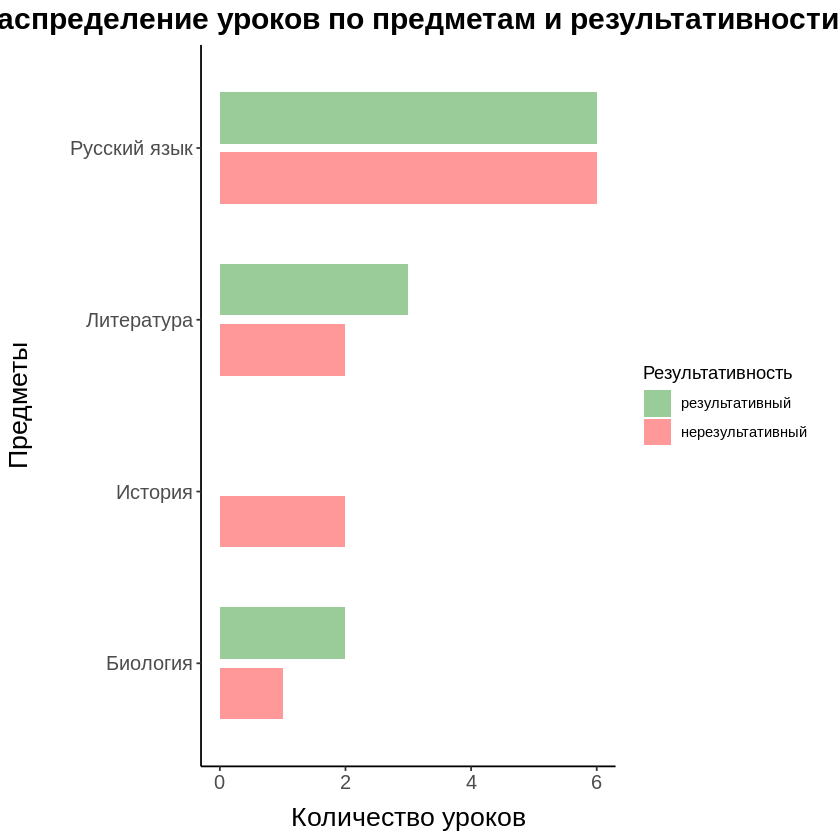

In [7]:
lesson_stats %>%
  count(subject, is_effective) %>%
  pivot_longer(cols = c(is_effective),
               names_to = "effectiveness",
               values_to = "value") %>%
  mutate(effectiveness = ifelse(value, "результативный", "нерезультативный")) ->
  lesson_stats_longer

# приведение в длинный вид для предметов
subject_stats_longer <- lesson_stats %>%
  count(subject, is_effective) %>%
  complete(subject, is_effective = c(TRUE, FALSE), fill = list(n = 0)) %>%
  mutate(
    effectiveness = ifelse(is_effective, "результативный", "нерезультативный"),
    subject_rus = case_when(
      subject == "biology" ~ "Биология",
      subject == "history" ~ "История",
      subject == "russian" ~ "Русский язык",
      subject == "literature" ~ "Литература"
    )
  )
subject_stats_longer %>%
      ggplot(aes(x = n,
           y = subject_rus,
           fill = effectiveness)) +
  geom_col(position = position_dodge(width = 0.7),
           width = 0.6) +
  scale_fill_manual(values = c("результативный" = "#99CC99",
"нерезультативный" = "#FF9999"),
                   name = "Результативность",
                   breaks = c("результативный", "нерезультативный") ) +
  labs(x = 'Количество уроков',
       y = 'Предметы',
       title = 'Распределение уроков по предметам и результативности') +
  theme_classic() +
  theme(
    plot.title = element_text(size = 18, face = "bold", hjust = 0.5),
    axis.title.x = element_text(size = 16, margin = margin(t = 10)),
    axis.title.y = element_text(size = 16, margin = margin(r = 10)),
    axis.text.x = element_text(size = 12),
    axis.text.y = element_text(size = 12),
    legend.position = "right") +
      guides(fill = guide_legend(
      title.position = "top",
      label.position = "right",
      direction = "vertical", ncol = 1))

ggsave('subject_distribution.png', width=10, height=5)

Стоит учитывать, что тематическое различие так или иначе присутствует, что может повлиять на результаты тестов:
* в подвыборке результативных учителей нет уроков истории, в то время как у нерезультативных их два
* у результативных учителей больше уроков биологии и литературы

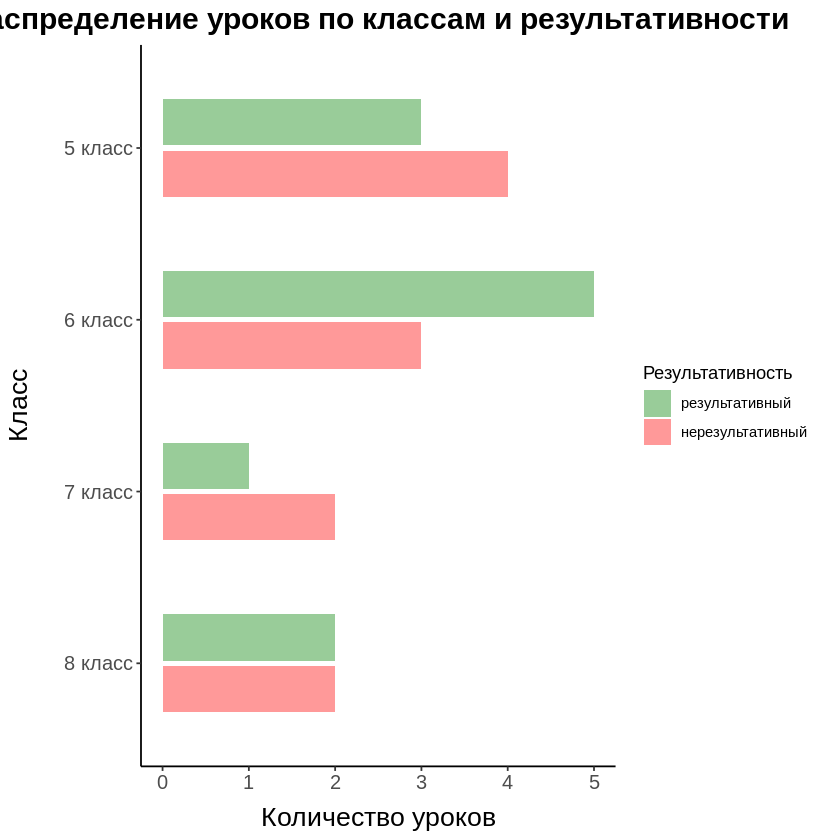

In [8]:
# для классов
grade_stats_longer <- lesson_stats %>%
  count(grade, is_effective) %>%
  complete(grade, is_effective = c(TRUE, FALSE), fill = list(n = 0)) %>%
  mutate(
    effectiveness = factor(
      ifelse(is_effective, "результативный", "нерезультативный"),
      levels = c("результативный", "нерезультативный")
    ),
    grade_label = paste(grade, "класс"),
    grade_reversed = max(grade) - grade + min(grade)
  )

ggplot(grade_stats_longer,
       aes(x = n,
           y = reorder(grade_label, grade_reversed),
           fill = effectiveness)) +
  geom_col(position = position_dodge2(width = 0.7, reverse = TRUE),
           width = 0.6) +
  scale_fill_manual(
    values = c("результативный" = "#99CC99",
              "нерезультативный" = "#FF9999"),
    name = "Результативность"
  ) +
  labs(x = 'Количество уроков',
       y = 'Класс',
       title = 'Распределение уроков по классам и результативности') +
  theme_classic() +
  theme(
    plot.title = element_text(size = 18, face = "bold", hjust = 0.5),
    axis.title.x = element_text(size = 16, margin = margin(t = 10)),
    axis.title.y = element_text(size = 16, margin = margin(r = 10)),
    axis.text.x = element_text(size = 12),
    axis.text.y = element_text(size = 12),
    legend.position = "right"
  )

ggsave('grade_distribution.png', width = 10, height = 5, dpi = 300)

Фактор класса также может повлиять на результат финальных тестирований гипотез, поскольку данные по классу явно не сбалансированы, как можно увидеть из графика.

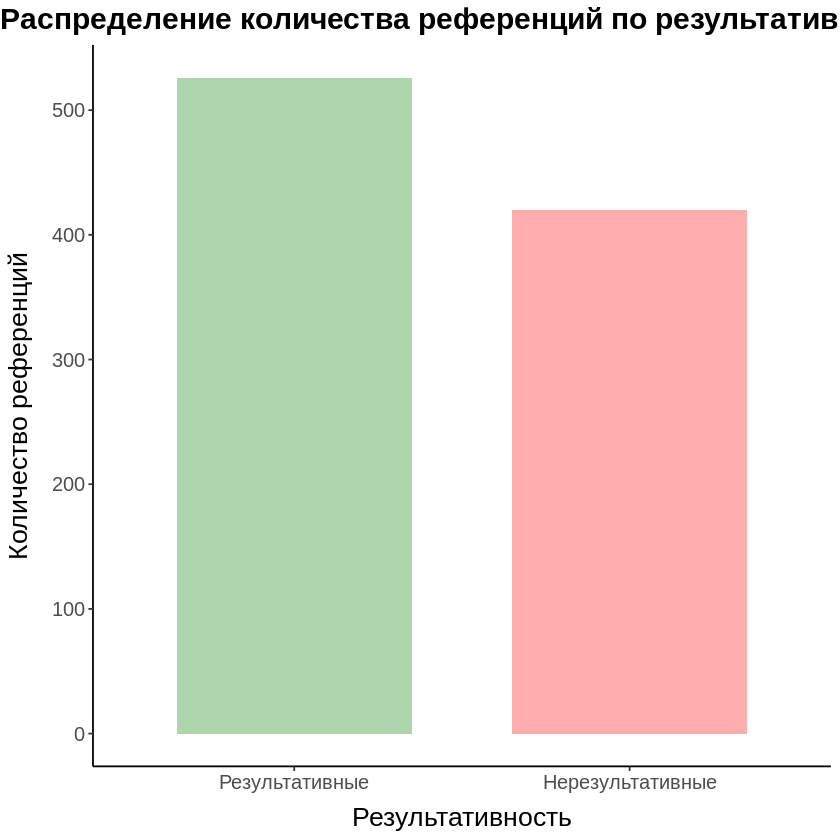

In [11]:
ggplot(voc_dataset, aes(x = factor(is_effective,
                                 levels = c(TRUE, FALSE),
                                 labels = c("Результативные", "Нерезультативные")))) +
  geom_bar(aes(fill = is_effective), alpha = 0.8, width = 0.7) +
  labs(title = "Распределение количества референций по результативности",
       x = "Результативность",
       y = "Количество референций") +
  scale_fill_manual(values = c("#FF9999", "#99CC99"),
                   name = NULL) +
  scale_x_discrete(labels = c("Результативные", "Нерезультативные")) +
  theme_classic() +
  theme(
    legend.position = "none",
    plot.title = element_text(size = 18, face = "bold", hjust = 0.5),
    axis.title.x = element_text(size = 16, margin = margin(t = 10)),
    axis.title.y = element_text(size = 16, margin = margin(r = 10)),
    axis.text.x = element_text(size = 12),
    axis.text.y = element_text(size = 12))

ggsave('quantity_distribution.png', width = 10, height = 5, dpi = 300)

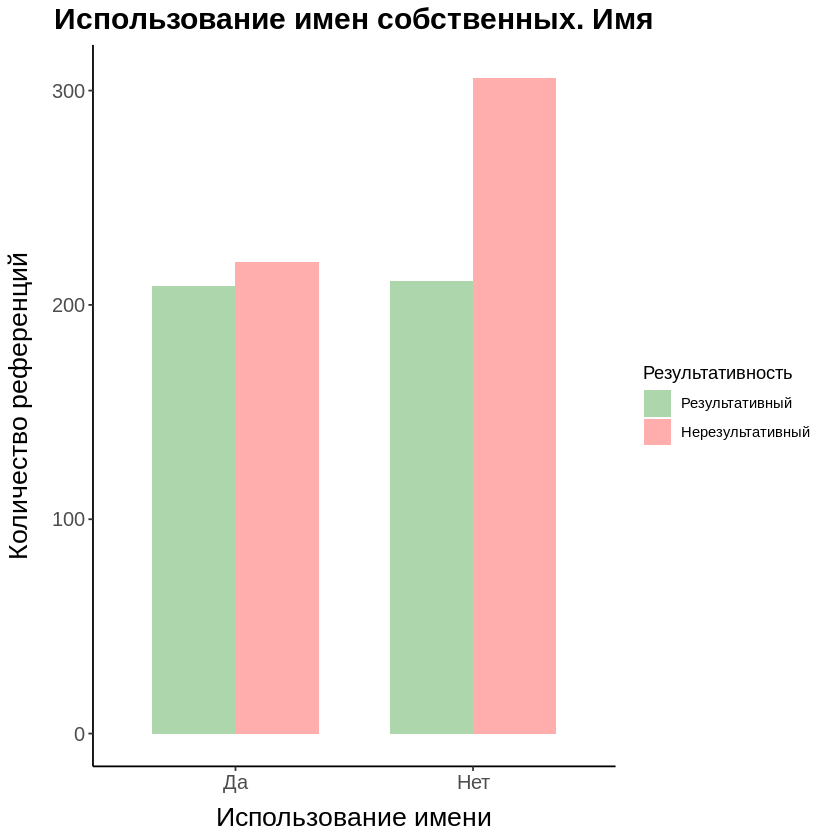

In [52]:
ggplot(voc_dataset, aes(x = is_name, fill = is_effective)) +
  geom_bar(position = position_dodge(preserve = "single"),
           width = 0.7,
           alpha = 0.8) +
  labs(title = "Использование имен собственных. Имя",
       x = "Использование имени",
       y = "Количество референций",
       fill = "Результативность") +
  scale_fill_manual(
    values = c("#99CC99", "#FF9999"),
    labels = c("Результативный", "Нерезультативный")
  ) +
  scale_x_discrete(labels = c("Да", "Нет")) +
  theme_classic() +
    theme(
    plot.title = element_text(size = 18, face = "bold", hjust = 0.5),
    axis.title.x = element_text(size = 16, margin = margin(t = 10)),
    axis.title.y = element_text(size = 16, margin = margin(r = 10)),
    axis.text.x = element_text(size = 12),
    axis.text.y = element_text(size = 12))

ggsave('isname_distribution.png', width = 10, height = 5, dpi = 300)

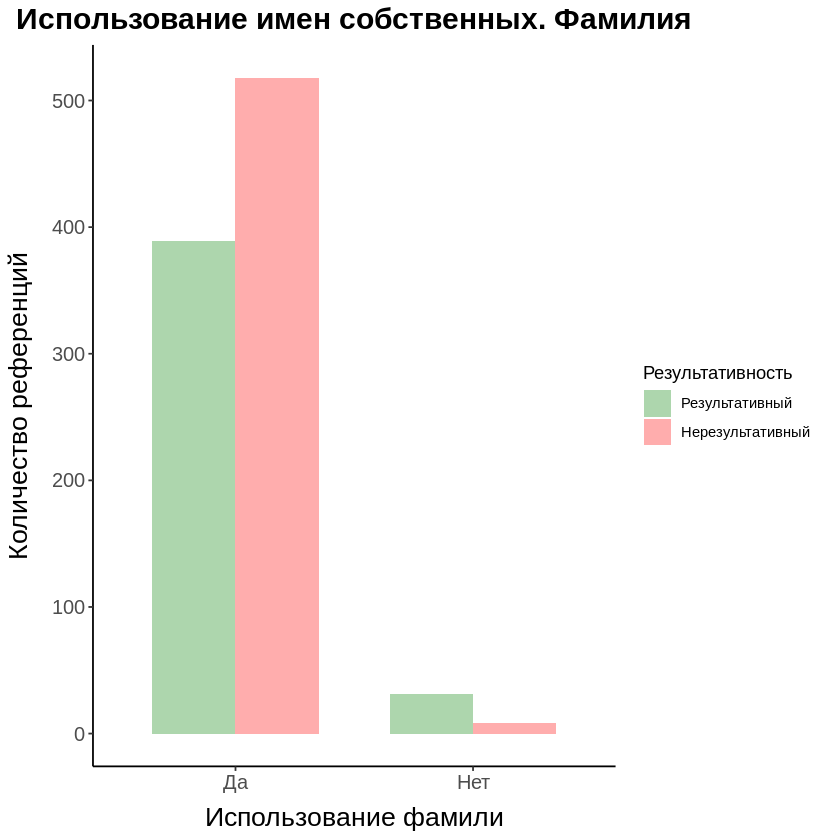

In [53]:
ggplot(voc_dataset, aes(x = is_surname, fill = is_effective)) +
  geom_bar(position = position_dodge(preserve = "single"),
           width = 0.7,
           alpha = 0.8) +
  labs(title = "Использование имен собственных. Фамилия",
       x = "Использование фамили",
       y = "Количество референций",
       fill = "Результативность") +
  scale_fill_manual(
    values = c("#99CC99", "#FF9999"),
    labels = c("Результативный", "Нерезультативный")
  ) +
  scale_x_discrete(labels = c("Да", "Нет")) +
  theme_classic() +
    theme(
    plot.title = element_text(size = 18, face = "bold", hjust = 0.5),
    axis.title.x = element_text(size = 16, margin = margin(t = 10)),
    axis.title.y = element_text(size = 16, margin = margin(r = 10)),
    axis.text.x = element_text(size = 12),
    axis.text.y = element_text(size = 12))

ggsave('issurname_distribution.png', width = 10, height = 5, dpi = 300)

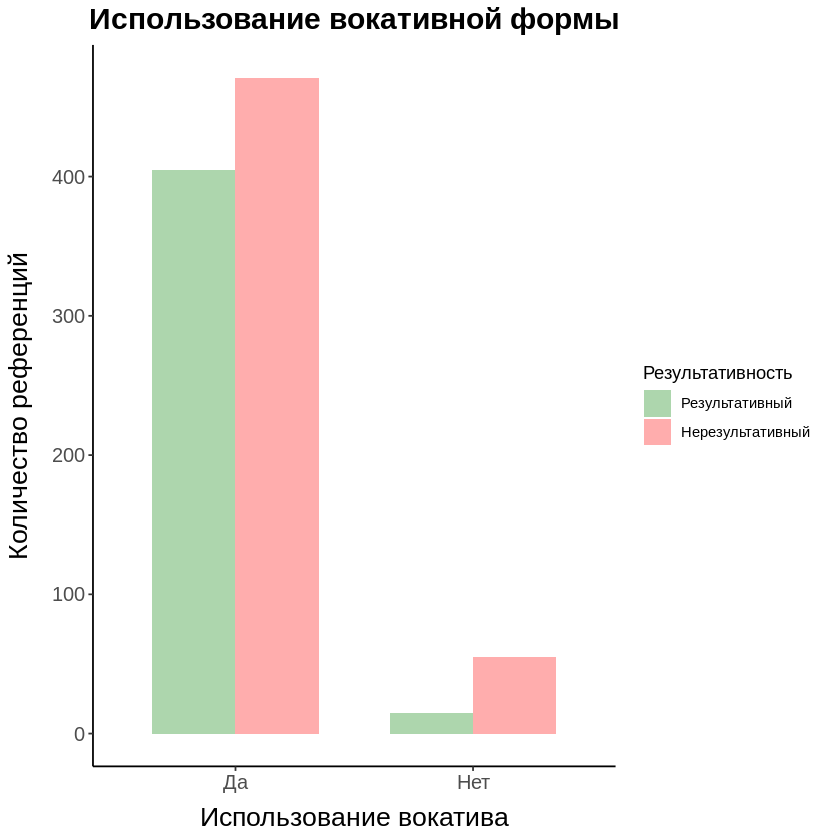

In [10]:
ggplot(voc_dataset, aes(x = is_voc, fill = is_effective)) +
  geom_bar(position = position_dodge(preserve = "single"),
           width = 0.7,
           alpha = 0.8) +
  labs(title = "Использование вокативной формы",
       x = "Использование вокатива",
       y = "Количество референций",
       fill = "Результативность") +
  scale_fill_manual(
    values = c("#99CC99", "#FF9999"),
    labels = c("Результативный", "Нерезультативный")
  ) +
  scale_x_discrete(labels = c("Да", "Нет")) +
  theme_classic() +
    theme(
    plot.title = element_text(size = 18, face = "bold", hjust = 0.5),
    axis.title.x = element_text(size = 16, margin = margin(t = 10)),
    axis.title.y = element_text(size = 16, margin = margin(r = 10)),
    axis.text.x = element_text(size = 12),
    axis.text.y = element_text(size = 12))

# Разведочный анализ данных: U-тест Манна-Уитни

Для того чтобы анализировать количество обращений стандартными мощными тестами, у нас достаточно мало данных. Проведем разведочный анализ, чтобы понять, существует ли у нас потенциально какая-то зависимости. Для этого подходит U-тест Манна-Уитни. Наши гипотезы:
* H0: распределения между результативностью учителя и общим количеством референций/ имен/фамилий/вокативов не отличаются (то есть может не быть никакой взаимосвязи между результативностью учителя и данными факторами)
* H1: распределения между результативностью учителя и общим количеством референций/ имен/фамилий/вокативов отличаются (может быть взаимосвязь между результативностью учителя и данными факторами)

Поскольку это разведочный анализ данных, а тест Манна-Уитни может давать ложноположительные результаты ввиду отсутствия у него должной мощности, возьмем наш уровень значимости α = 0.1, чтобы держать это в уме.

## Общее количество референций

In [54]:
# тест для общего количества референций
wilcox.test(total_references ~ is_effective, data = lesson_stats)

Warning message in wilcox.test.default(x = DATA[[1L]], y = DATA[[2L]], ...):
“cannot compute exact p-value with ties”



	Wilcoxon rank sum test with continuity correction

data:  total_references by is_effective
W = 35, p-value = 0.09913
alternative hypothesis: true location shift is not equal to 0


Прокомментирую предупреждение:

```
Warning message in wilcox.test.default(x = DATA[[1L]], y = DATA[[2L]], ...):
“cannot compute exact p-value with ties”
```

По всей видимости, в наших данных встретились несколько уроков с одинаковым числом референций. В этом случае используется приближение Монте-Карло, то есть p-value высчитывается не с аналитической точностью, а аппроксимируется.

**Интерпретация**

Применение U-теста Манна-Уитни показало, что на уровне значимости α = 0.1 **можно** отвергнуть нулевую гипотезу об отсутствии разницы в распределениях между результативностью учителя и количеством референций в его уроке (W = 35, p-value = 0.09913).

## Количество референций по имени

In [38]:
wilcox.test(name_refs ~ is_effective, data = lesson_stats)

Warning message in wilcox.test.default(x = DATA[[1L]], y = DATA[[2L]], ...):
“cannot compute exact p-value with ties”



	Wilcoxon rank sum test with continuity correction

data:  name_refs by is_effective
W = 37.5, p-value = 0.1392
alternative hypothesis: true location shift is not equal to 0


**Интерпретация**

Применение U-теста Манна-Уитни показало, что на уровне значимости α = 0.1 нельзя отвергнуть нулевую гипотезу об отсутствии разницы в распределениях между результативностью учителя и количеством референций по имени в его уроке (W = 37.5, p-value = 0.1392).

## Количество референций по фамилии

In [55]:
wilcox.test(surname_refs ~ is_effective, data = lesson_stats)

Warning message in wilcox.test.default(x = DATA[[1L]], y = DATA[[2L]], ...):
“cannot compute exact p-value with ties”



	Wilcoxon rank sum test with continuity correction

data:  surname_refs by is_effective
W = 81.5, p-value = 0.1594
alternative hypothesis: true location shift is not equal to 0


**Интерпретация**

Применение U-теста Манна-Уитни показало, что на уровне значимости α = 0.1 нельзя отвергнуть нулевую гипотезу об отсутствии разницы в распределениях между результативностью учителя и количеством референций по имени в его уроке (W = 81.5, p-value = 0.1594).

## Количество референций в форме вокатива

In [40]:
wilcox.test(voc_refs ~ is_effective, data = lesson_stats)

Warning message in wilcox.test.default(x = DATA[[1L]], y = DATA[[2L]], ...):
“cannot compute exact p-value with ties”



	Wilcoxon rank sum test with continuity correction

data:  voc_refs by is_effective
W = 31, p-value = 0.05173
alternative hypothesis: true location shift is not equal to 0


**Интерпретация**

Применение U-теста Манна-Уитни показало, что на уровне значимости α = 0.1 можно отвергнуть нулевую гипотезу об отсутствии разницы в распределениях между результативностью учителя и количеством референций по имени в его уроке (W = 31, p-value = 0.05173).

## Количество референций в форме единственного числа

In [43]:
wilcox.test(sing_ref ~ is_effective, data = lesson_stats)

Warning message in wilcox.test.default(x = DATA[[1L]], y = DATA[[2L]], ...):
“cannot compute exact p-value with ties”



	Wilcoxon rank sum test with continuity correction

data:  sing_ref by is_effective
W = 41, p-value = 0.2115
alternative hypothesis: true location shift is not equal to 0


**Интерпретация**

Применение U-теста Манна-Уитни показало, что на уровне значимости α = 0.1 нельзя отвергнуть нулевую гипотезу об отсутствии разницы в распределениях между результативностью учителя и количеством референций по имени в его уроке (W = 41, p-value = 0.2115).

## U-тест Манна-Уитни для долей

Попробуем на том же уровне значимости α = 0.1 проверить, если ли какая-то взаимосвязь, если имена, фамилии, число и вокатив мы будем считать относительно общего количества обращений.

In [58]:
lesson_stats <- lesson_stats %>%
  mutate(
    name_refs_ratio = name_refs / total_references,
    surname_refs_ratio = surname_refs / total_references,
    voc_refs_ratio = voc_refs / total_references,
    sing_ref_ratio = sing_ref / total_references
  )
head(lesson_stats)

lesson_id,is_effective,subject,grade,duration,total_references,name_refs,surname_refs,voc_refs,sing_ref,name_refs_ratio,surname_refs_ratio,voc_refs_ratio,sing_ref_ratio
<dbl>,<lgl>,<chr>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,TRUE,biology,6,2268,63,44,0,2,48,0.6984127,0.00000000,0.03174603,0.7619048
1,TRUE,biology,8,2378,57,17,0,13,18,0.2982456,0.00000000,0.22807018,0.3157895
2,TRUE,literature,5,1803,43,15,0,10,27,0.3488372,0.00000000,0.23255814,0.6279070
3,TRUE,literature,6,2237,39,33,0,1,38,0.8461538,0.00000000,0.02564103,0.9743590
4,TRUE,literature,6,2317,56,37,1,5,42,0.6607143,0.01785714,0.08928571,0.7500000
5,TRUE,russian,5,2433,38,27,1,0,30,0.7105263,0.02631579,0.00000000,0.7894737


### Доля референций по имени

In [61]:
wilcox.test(name_refs_ratio ~ is_effective, data = lesson_stats)

Warning message in wilcox.test.default(x = DATA[[1L]], y = DATA[[2L]], ...):
“cannot compute exact p-value with ties”



	Wilcoxon rank sum test with continuity correction

data:  name_refs_ratio by is_effective
W = 52, p-value = 0.5993
alternative hypothesis: true location shift is not equal to 0


**Интерпретация**

Применение U-теста Манна-Уитни показало, что на уровне значимости α = 0.1 нельзя отвергнуть нулевую гипотезу об отсутствии разницы в распределениях между результативностью учителя и долей референций по имени в его уроке (W = 52, p-value = 0.5993).

### Доля референций по фамилии

In [62]:
wilcox.test(surname_refs_ratio ~ is_effective, data = lesson_stats)

Warning message in wilcox.test.default(x = DATA[[1L]], y = DATA[[2L]], ...):
“cannot compute exact p-value with ties”



	Wilcoxon rank sum test with continuity correction

data:  surname_refs_ratio by is_effective
W = 83.5, p-value = 0.1296
alternative hypothesis: true location shift is not equal to 0


**Интерпретация**

Применение U-теста Манна-Уитни показало, что на уровне значимости α = 0.1 нельзя отвергнуть нулевую гипотезу об отсутствии разницы в распределениях между результативностью учителя и долей референций по фамилии в его уроке (W = 83.5, p-value = 0.1296).

### Доля референций по форме вокатива

In [63]:
wilcox.test(voc_refs_ratio ~ is_effective, data = lesson_stats)

Warning message in wilcox.test.default(x = DATA[[1L]], y = DATA[[2L]], ...):
“cannot compute exact p-value with ties”



	Wilcoxon rank sum test with continuity correction

data:  voc_refs_ratio by is_effective
W = 45.5, p-value = 0.3331
alternative hypothesis: true location shift is not equal to 0


**Интерпретация**

Применение U-теста Манна-Уитни показало, что на уровне значимости α = 0.1 нельзя отвергнуть нулевую гипотезу об отсутствии разницы в распределениях между результативностью учителя и долей референций по форме вокатива в его уроке (W = 45.5, p-value = 0.3331).

### Доля референций по форме единственного числа

In [66]:
wilcox.test(sing_ref_ratio ~ is_effective, data = lesson_stats)

Warning message in wilcox.test.default(x = DATA[[1L]], y = DATA[[2L]], ...):
“cannot compute exact p-value with ties”



	Wilcoxon rank sum test with continuity correction

data:  sing_ref_ratio by is_effective
W = 63.5, p-value = 0.8692
alternative hypothesis: true location shift is not equal to 0


**Интерпретация**

Применение U-теста Манна-Уитни показало, что на уровне значимости α = 0.1 нельзя отвергнуть нулевую гипотезу об отсутствии разницы в распределениях между результативностью учителя и долей референций по форме единственного числа в его уроке (W = 63.5, p-value = 0.8692).

# Generalized Estimating Equations: анализ важности предикторов

Для анализа важности предикторов было решено взять GEE-модель (Generalized Estimating Equations) для всего большого датасета по следующим причинам:
1. Несколько наблюдений относятся к одному уроку/учителю, что нарушает предположение о независимости. GEE корректирует стандартные ошибки с учётом кластеризации.
2. Бинарный исход: is_effective — бинарная переменная, поэтому используется family = binomial.
3. Корреляционная структура: exchangeable предполагает, что все наблюдения внутри урока коррелируют одинаково.
4. В отличие от GLMM, GEE даёт популяционные эффекты (средние по группе), а не индивидуальные, и устойчив к малым размерам кластеров (у меня всего 22 урока).

In [73]:
gee_model <- geepack::geeglm(
  is_effective ~ is_voc + is_sing + is_name + is_surname +
    is_fullname,
  id = lesson_id,
  data = voc_dataset,
  family = binomial,
  corstr = "exchangeable"
)
summary(gee_model)


Call:
geepack::geeglm(formula = is_effective ~ is_voc + is_sing + is_name + 
    is_surname + is_fullname, family = binomial, data = voc_dataset, 
    id = lesson_id, corstr = "exchangeable")

 Coefficients:
                 Estimate   Std.err  Wald Pr(>|W|)    
(Intercept)      3.42e-09  4.26e-01  0.00  1.00000    
is_vocTRUE       9.89e-10  3.42e-10  8.37  0.00381 ** 
is_sing         -7.45e-10  2.11e-10 12.49  0.00041 ***
is_nameTRUE      1.03e-09  2.66e-10 14.89  0.00011 ***
is_surnameTRUE  -1.57e-09  7.46e-10  4.42  0.03562 *  
is_fullnameTRUE -1.57e-09  8.10e-10  3.74  0.05311 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation structure = exchangeable 
Estimated Scale Parameters:

            Estimate Std.err
(Intercept)        1  0.0956
  Link = identity 

Estimated Correlation Parameters:
      Estimate Std.err
alpha        1     0.1
Number of clusters:   22  Maximum cluster size: 101 

Все коэффициенты крайне малы (~1e-09), но их направление и значимость можно интерпретировать:

* `is_vocTRUE`: использование вокатива может быть связано с результативностью учительских практик (OR ≈ 1.0, p = 0.0038)
* `is_sing`: упоминание в единственном числе (is_sing) может быть маркером нерезультативного учителя (OR ≈ 1.0, p = 0.0004)
* `is_nameTRUE`: персонализированные обращения по имени могут свидетельствовать об эффективных учительских практиках (OR ≈ 1.0, p = 0.0001)
* `is_surnameTRUE`: частые обращения по фамилии могут говорить о нерезультативных учительских практиках (OR ≈ 1.0, p = 0.035)
* `is_fullnameTRUE`: обращение и по имени, и по фамилии имеет слабый отрицательный эффект на грани значимости (OR ≈ 1.0, p = 0.053).

# Ограничения анализа

# Дальнейшая работа